In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np

# Read the provided CSV file/data set.
df = pd.read_csv('../Data/breast_cancer_data.csv', index_col='id') 

# Print the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Explore the data

In [3]:
# check for missing values
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
# Drop the column with missing data
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 3. Prepare the data for creating a decision tree

In [13]:
# Set the variables.
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

## 4. Fit the tree, and evaluate the options

In [14]:
# Create the testing data with random_state=0, test_size=0.3.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [27]:
# Import the DecisionTreeClassifier class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# Create a classification decision tree classifier object as dtc. 
dtc = DecisionTreeClassifier(random_state=0)

# Train the decision tree classifier.
dtc = dtc.fit(X_train, y_train) 

# Predict the response for the test data set.
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [28]:
# Import scikit-learn metrics module for accuracy calculation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

# Use the print() function to display the confusion matrix results.
print(confusion_matrix(y_test, y_pred_test))

# Metrics for accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test)) 
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train)) 

[[97 11]
 [ 4 59]]
Accuracy: 0.9122807017543859
Accuracy: 1.0


In [29]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 

# Print accuracy values
print(accuracy_score(y_train,y_pred_train)) # prediction is the same as the observation
print(accuracy_score(y_test, y_pred_test)) # prediction on 'unseen data'

1.0
0.9122807017543859


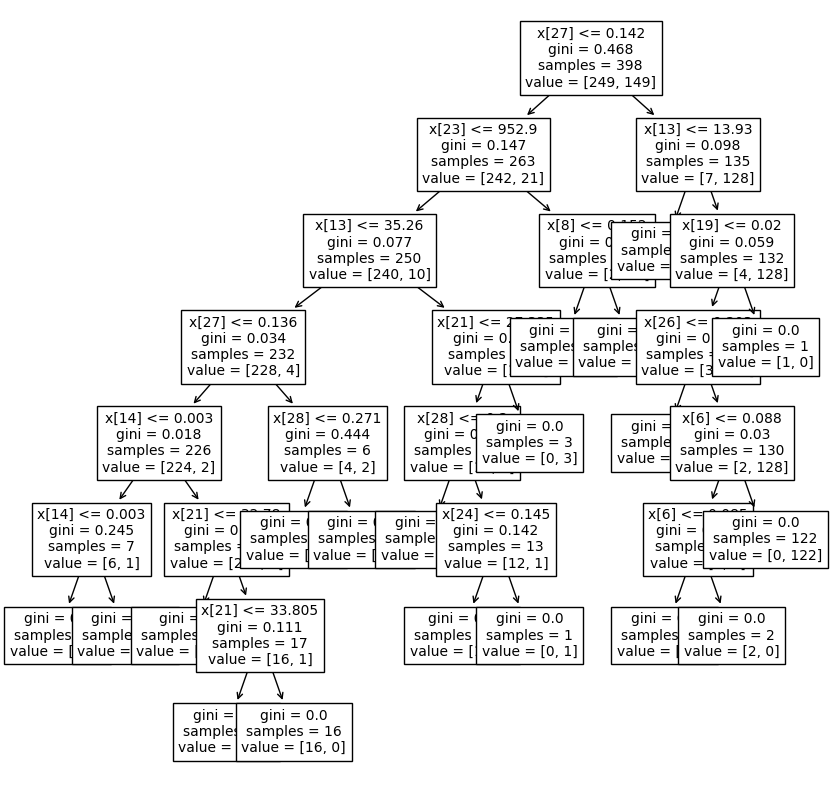

In [30]:
# Plot the tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)

# Print the plot with plt.show().
plt.show() 

In [26]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
clfp = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)
clfp.fit(X_train,y_train)
y_predicted=clfp.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9532163742690059

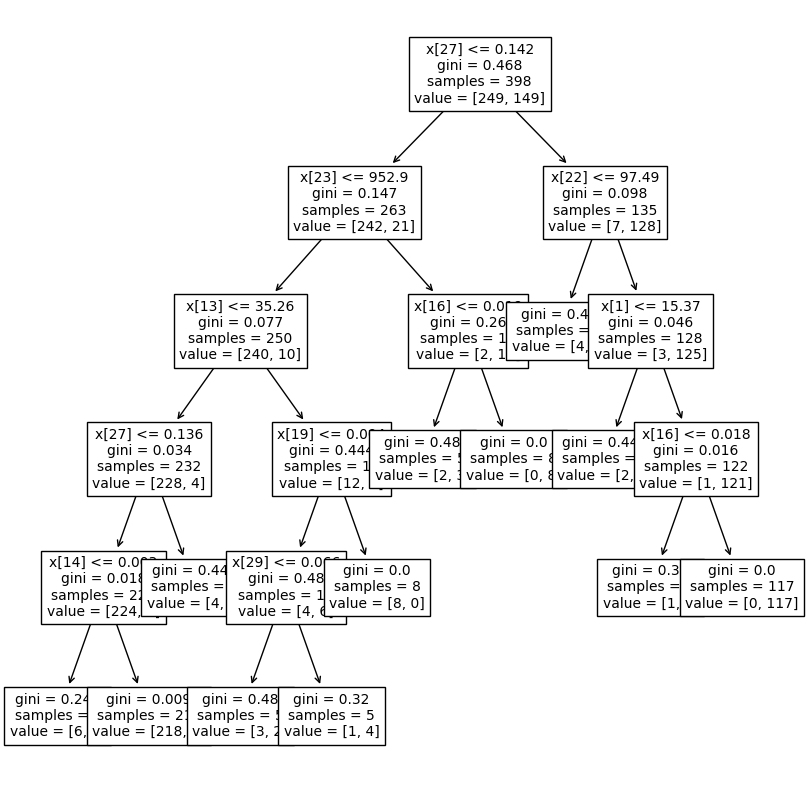

In [31]:
# Plot the pruned tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clfp, fontsize=10)

# Print the plot with plt.show().
plt.show() 

## 5. Evaluate the goodness of fit

In [32]:
# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View the output.
confusion

,predicted_healthy,predicted_cancer
is_healthy,103,5
is_cancer,3,60


<Axes: >

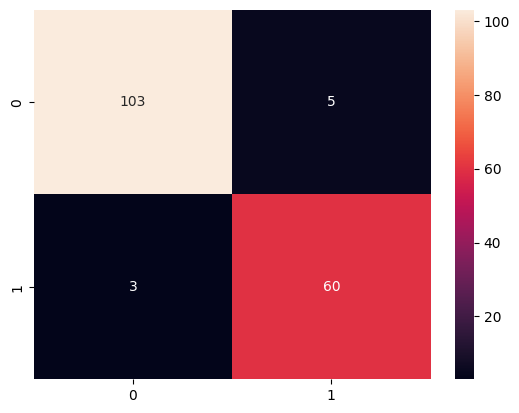

In [33]:
# Plot the confusion_matrix. #NOTE: Color scheme misleading as we are not plotting %'s
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [34]:
# Print the accuracy and classification report.
print(metrics.accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

0.9532163742690059
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       108
           M       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## 6. Fit the final model

In [37]:
# Create a Decision Tree classifer object.
clff = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)

# Train the Decision Tree Classifer.
clff = clff.fit(X, y)
y_pred2 = clff.predict(X)
accuracy_score(y, y_pred2)

0.9771528998242531

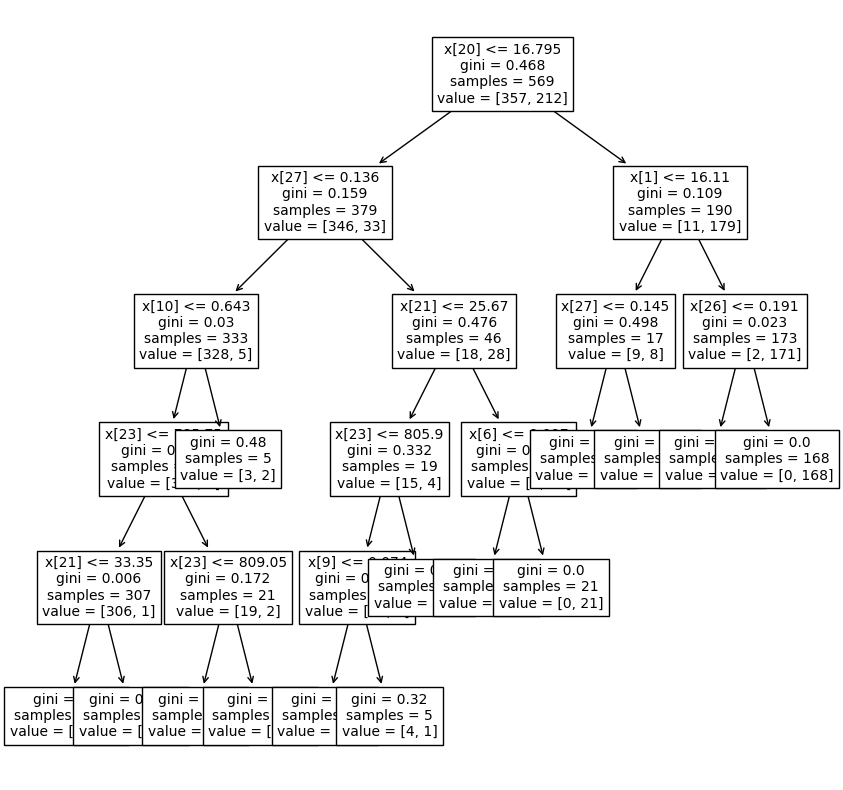

In [36]:
# Plot final model

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clff, fontsize=10)

# Print the plot with plt.show().
plt.show() 